<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe10-TopologicalSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Topological Sort

## 2.1 Código

### Funciones auxiliares

In [100]:
import networkx as nx

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()

  for i in graph.keys():
    nxdigraph.add_node(i, order=0, state=0)
    for v in graph[i]:
      nxdigraph.add_node(v, order=0, state=0)
      nxdigraph.add_edge(i, v)

  return nxdigraph

def draw_graph(G):
  labels = dict()
  for i in G.nodes():
    labels[i] = chr(ord('a') + i) + '\n' + str(G.nodes[i]['order'])

  pos = nx.spring_layout(G,k=10,seed=1)
  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='black')

### Topological Sort (DFS iterativo)

In [105]:
# 0: No descubierto
# 1: Descubierto
# 2: Visitado

def DFS_iterativo(G, initial, cont):
  S = list()
  S.append(initial)

  while len(S) > 0:
    n = S.pop()

    if G.nodes[n]['state'] == 0:
      G.nodes[n]['state'] = 1
      S.append(n)

      for adj in reversed(list(G[n])):
        if G.nodes[adj]['state'] == 0:
          S.append(adj)

    elif G.nodes[n]['state'] == 1:
      G.nodes[n]['order'] = cont
      G.nodes[n]['state'] = 2
      cont += 1

  return cont

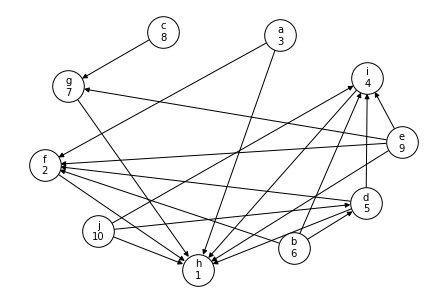

In [104]:
def topological_sort_iterativo(G, visualize=False):
  cont = 1

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      cont = DFS_iterativo(G, n, cont)

  if visualize == True:
    draw_graph(G)

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
topological_sort_iterativo(G, True)

### Topological Sort (DFS recursivo)

In [136]:
def DFS_recursivo(G, initial, cont):
  if G.nodes[initial]['state'] == 0:
    G.nodes[initial]['state'] = 1

    for adj in reversed(list(G[initial])):
        cont = DFS_recursivo(G, adj, cont)

    G.nodes[initial]['order'] = cont
    G.nodes[initial]['state'] = 2
    cont += 1

  return cont  

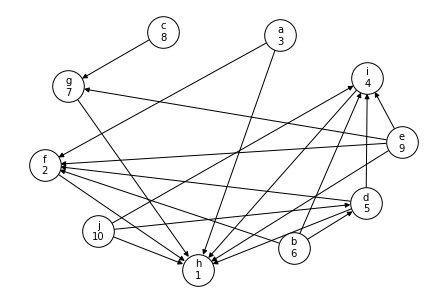

In [138]:
def topological_sort_recursivo(G, visualize=False):
  cont = 1

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      cont = DFS_recursivo(G, n, cont)

  if visualize == True:
    draw_graph(G)

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
topological_sort_recursivo(G, True)

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en los pasos de cada algoritmo:

In [99]:
from collections import defaultdict
import networkx as nx
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph